Accuracy: 0.8344594594594594

Classification Report:
               precision    recall  f1-score   support

       Green       0.95      0.94      0.95       135
Green_Yellow       0.77      0.78      0.77        81
      Yellow       0.70      0.71      0.71        80

    accuracy                           0.83       296
   macro avg       0.81      0.81      0.81       296
weighted avg       0.84      0.83      0.84       296



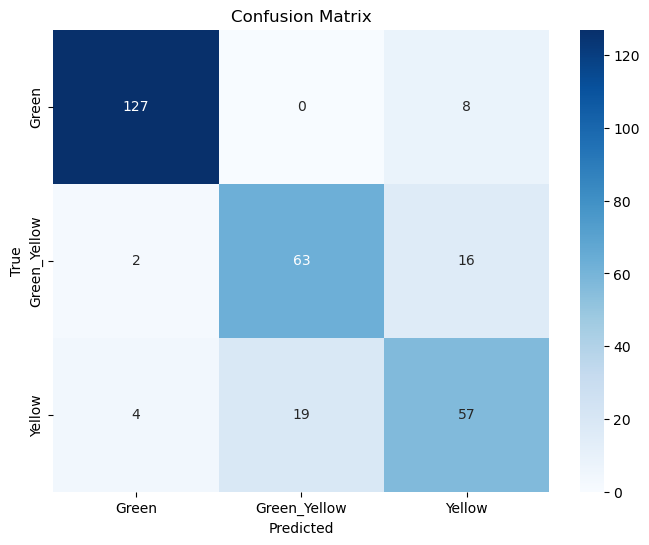

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('ripeness_dataset2.csv')

# Prepare data
X = df.filter(like='feature_')
y = df['label']

# Split using original splits
X_train = X[df['split'] == 'train']
y_train = y[df['split'] == 'train']
X_test = X[df['split'] == 'test']
y_test = y[df['split'] == 'test']

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Print metrics
print("Accuracy:", knn.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()